## Цель работы
 Изучение связи между признаками двумерного набора данных, визуализация данных.
## Вариант
Содержит информацию о зарплатах.
1
Год выплаты заработной платы (целое число)
2
Тип работы (PT - Part-time, FT - Full-time, FL - Freelance)
3
Должность
4
Зарплата за год (целое число)
5
Зарплата в долларах (целое число)
6
Страна проживания
7
Страна главного офиса
8
Среднее кол-во людей в компании (S - менее 50
сотрудников (малая), M от 50 до 250 сотрудников (средняя), L - более 250 сотрудников (крупная))
9 
Общий опыт работы
10
Опыт на последней работе

**Задание 1: Использовать seaborn.** По группировке - **work_year** и количество компаний по различному типу занятости (**employment_type**) построить диаграмму.

**Задание 2: Использовать pandas и plot.** По сводной таблице (pivot_table) - отобразить среднюю зарплату в usd по локациям (**company_location**). Сделать линию зелёной, шириной 4 и отобразить маркеры в виде *.

**Задание 3: Использовать matplotlib.** Построить круговую диаграмму, которая отображает процент количества записей по каждому году.


## Ход работы

Выполняется подготовку к лабораторной работе. В качестве файла используем salary2. После выводим 20 строк из файла для ознакомления с данными.

In [1108]:
import pandas as pd
df = pd.read_csv('salary2.csv', sep=';')

df.head(n=20)

,work_year,employment_type,job_title,salary,salary_in_usd,employee_residence,company_location,company_size,exp_all,exp
0,2020.0,FT,Data SCIENTIST,70000.0,79833.0,DE,DE,L,9,4
1,2020.0,FT,Product Data Analyst,20000.0,20000.0,HN,HN,S,2,2
2,2020.0,FT,Data Analyst,72000.0,72000.0,US,US,L,13,3
3,2020.0,FT,Data Scientist,11000000.0,35735.0,HU,HU,L,60,6
4,2020.0,FT,Data Scientist,45000.0,51321.0,FR,FR,S,8,4
5,2020.0,FT,Data Scientist,3000000.0,40481.0,IN,IN,L,53,1
6,2020.0,FT,Data Scientist,35000.0,39916.0,FR,FR,M,6,2
7,2020.0,FT,Data Analyst,85000.0,85000.0,US,US,L,15,2
8,2020.0,FT,Data Analyst,8000.0,8000.0,PK,PK,Large,1,4
9,2020.0,FT,Data Engineer,4450000.0,41689.0,JP,JP,S,50,5


Данные содержат информацию о зарплатах и работах и содержат поля: год работы, тип работы, название работы, зарплата в у.е. и в долларах, страну проживания работника, страну компании и размер компании. Посмотрим информацию о данных. 

In [1109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           401 non-null    float64
 1   employment_type     401 non-null    object 
 2   job_title           401 non-null    object 
 3   salary              398 non-null    float64
 4   salary_in_usd       401 non-null    float64
 5   employee_residence  401 non-null    object 
 6   company_location    401 non-null    object 
 7   company_size        401 non-null    object 
 8   exp_all             401 non-null    int64  
 9   exp                 401 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 31.5+ KB


Изменяется тип данных для полей work_year, salary_in_usd, salary на int, так как они являются целочисленными. 

In [1110]:
df['salary'] = df['salary'].astype(int, errors='ignore')
df['work_year'] = df['work_year'].astype(int)
df['salary_in_usd'] = df['salary_in_usd'].astype(int)

Описываются числовые столбцы.

In [1111]:
df.describe()

,work_year,salary,salary_in_usd,exp_all,exp
count,401.000000,3.980000e+02,401.000000,401.000000,401.000000
mean,2021.528678,2.888336e+05,105895.017456,17.197007,4.486284
std,0.678086,1.677081e+06,58183.664171,11.133445,2.027421
min,2020.000000,4.000000e+03,2859.000000,0.000000,-1.000000
25%,2021.000000,6.700000e+04,65013.000000,10.000000,3.000000
50%,2022.000000,1.091400e+05,100000.000000,15.000000,4.000000
75%,2022.000000,1.500000e+05,140000.000000,22.000000,6.000000
max,2022.000000,3.040000e+07,412000.000000,81.000000,10.000000


Данные корректны, но в столбце salary есть пропуски. Они заменяются на среднее. Заменить столбцы именно на среднее оптиимальнее всего так как в итоге это сильно не скажется на большинстве показателей, в отличие от замены на 0. Также, удалять данные не оптимально, так как уменьшится информации в других столбцах, что может потом навредить выводам.

In [1112]:
df['salary'] = df['salary'].fillna(df['salary'].mean())

df['salary'] = df['salary'].astype(int)

df['salary'].describe()

count    4.010000e+02
mean     2.888336e+05
std      1.670780e+06
min      4.000000e+03
25%      6.700000e+04
50%      1.092800e+05
75%      1.500750e+05
max      3.040000e+07
Name: salary, dtype: float64

Проводится проверка данных:
1. Некорректные названия столбцов



In [1113]:
df.columns

Index(['work_year', 'employment_type', 'job_title', 'salary', 'salary_in_usd',
       'employee_residence', 'company_location', 'company_size', 'exp_all',
       'exp'],
      dtype='object')

Столбцы не содержат пробелов, написаны на одном языке и имеют нижний регистр, однако столбцы exp и exp_all кажутся непонятными. Они заменяются на experience и experience_all соответственно.

In [1114]:
df = df.rename(columns={'exp': 'experience', 'exp_all': 'experience_all'})

2. Дубликаты в данных

In [1115]:
print(df.duplicated().sum())

0


Явные дубликаты в данных не нашлись.

Находятся неявные дубликаты в данных. Проверять зарплаты не будем, так как они могут сильно различаться.

In [1116]:
print('work_year: ', df['work_year'].unique())
print('employment_type: ', df['employment_type'].unique())
print('job_title: ', df['job_title'].unique())
print('employee_residence: ', df['employee_residence'].unique())
print('company_location: ', df['company_location'].unique())
print('company_size: ', df['company_size'].unique())
print('experience: ', df['experience'].unique())
print('experience_all: ', df['experience_all'].unique())


work_year:  [2020 2021 2022]
employment_type:  ['FT' 'PT' 'FL']
job_title:  ['Data SCIENTIST' 'Product Data Analyst' 'Data Analyst' 'Data Scientist'
 'Data Engineer' 'Machine Learning Manager' 'Data Analytics Engineer'
 'Data Science Engineer' 'Machine Learning Developer'
 'Data Analytics Manager' 'Head of Data Science'
 'Head of Machine Learning' 'NLP Engineer' 'Data Analytics Lead'
 'DataScientist' 'Data AnalyticsManager']
employee_residence:  ['DE' 'HN' 'US' 'HU' 'FR' 'IN' 'PK' 'JP' 'GR' 'MX' 'CA' 'AT' 'NG' 'PH'
 'GB' 'ES' 'IT' 'PL' 'BG' 'NL' 'IQ' 'UA' 'SG' 'RU' 'MT' 'CL' 'RO' 'IR'
 'VN' 'BR' 'HK' 'TR' 'RS' 'AR' 'DZ' 'AU' 'CH']
company_location:  ['DE' 'HN' 'US' 'HU' 'FR' 'IN' 'PK' 'JP' 'GR' 'MX' 'CA' 'AT' 'NG' 'GB'
 'ES' 'IT' 'LU' 'PL' 'NL' 'IQ' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'BR' 'VN'
 'TR' 'DZ' 'MY' 'AU' 'CH']
company_size:  ['L' 'S' 'M' 'Large']
experience:  [ 4  2  3  6  1  5  8  7  9  0 10 -1]
experience_all:  [ 9  2 13 60  8 53  6 15  1 50 58  4 20  7 12 16 17 37 10 72 11  5 2

Некорректные данные, а именно данные с опечатками и с нарушенным регистром, заменяются на корректные.

In [1117]:
df['job_title'] = df['job_title'].replace(['DataScientist', 'Data SCIENTIST'], 'Data Scientist')

df['job_title'] = df['job_title'].replace(['Data AnalyticsManager'], 'Data Analytics Manager')

df['job_title'].value_counts()

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   98
Data Analytics Manager          8
Data Analytics Engineer         4
Head of Data Science            4
Data Science Engineer           3
Machine Learning Developer      3
Product Data Analyst            2
Machine Learning Manager        1
Head of Machine Learning        1
NLP Engineer                    1
Data Analytics Lead             1
Name: count, dtype: int64

Так же заменяются разные данные, обозначающие одно и то же, на одинаковые. 

In [1118]:
df['company_size'] = df['company_size'].replace('Large', 'L')

df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

После этого убираются неккоректные данные, а именно отрицательные данные опыта работы. Решено было их заменить на их модуль, так как такие данные скорее всего опечатка.

In [1119]:
df['experience'] = df['experience'].apply(lambda x: -x if x < 0 else x)

df['experience'].unique()

array([ 4,  2,  3,  6,  1,  5,  8,  7,  9,  0, 10], dtype=int64)

Выполненяются общие задания. Для этого импортируются нужные библиотеки.

In [1120]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

Строится точечная диаграмма. На ней видно, что с увеличением опыта работы увеличивается зарплата. Также видно, что у фрилансеров зарплата выше, чем у остальных.

KeyboardInterrupt: 

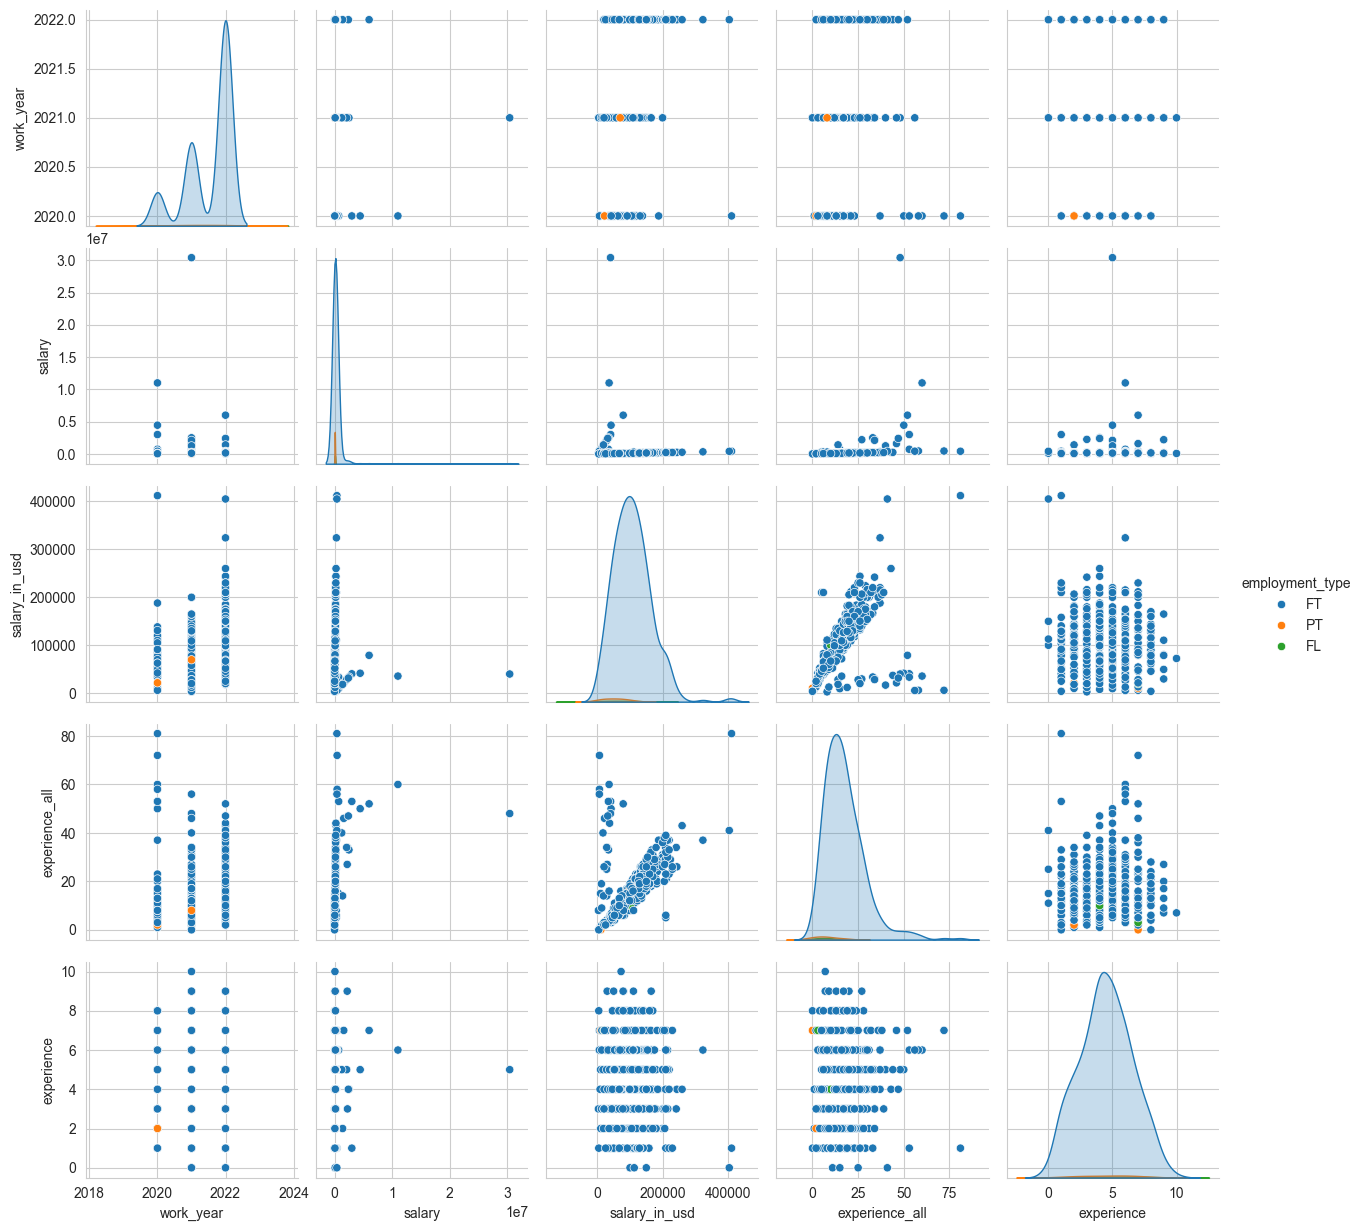

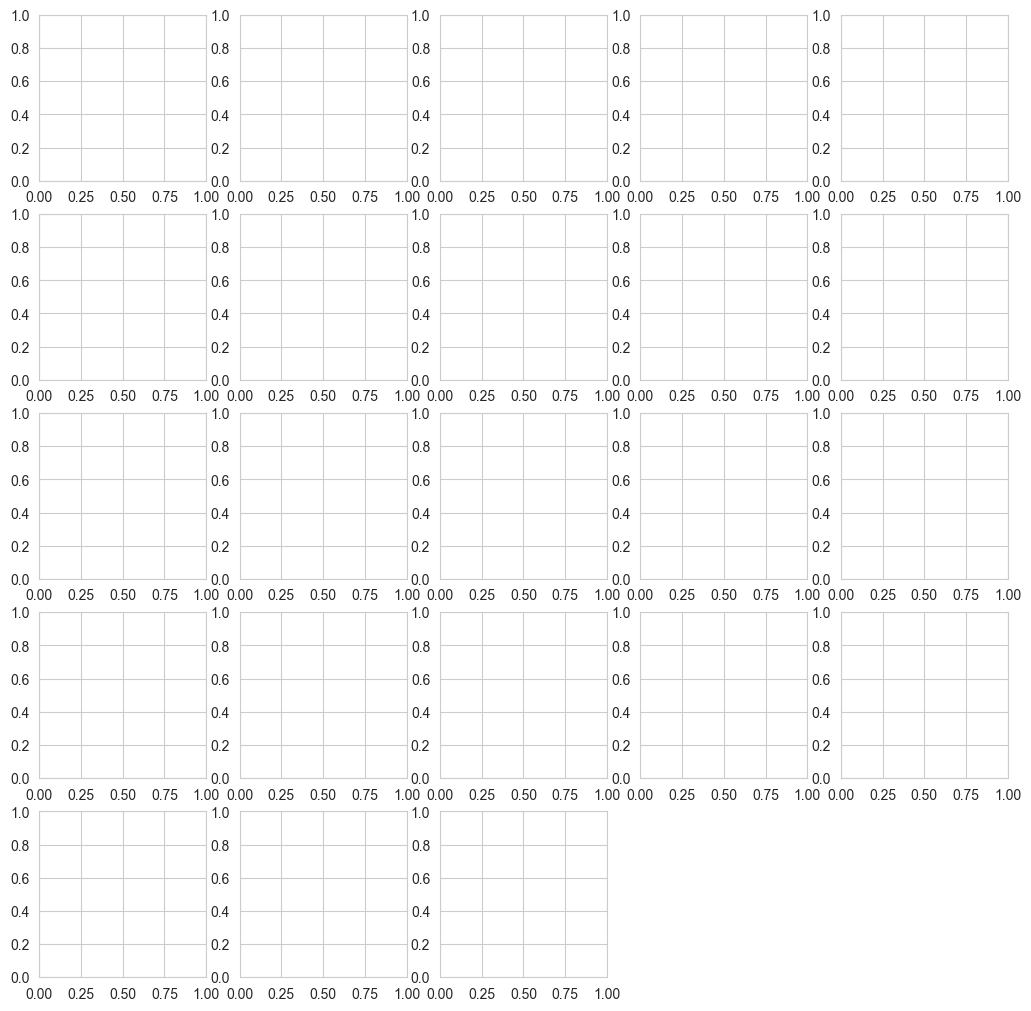

In [1121]:
sns.pairplot(df, hue = 'employment_type')
sns.pairplot(df, hue = 'company_size')
sns.pairplot(df, hue = 'work_year')

In [1093]:
df.corr(numeric_only=True)

,work_year,salary,salary_in_usd,experience_all,experience
work_year,1.000000,-0.095870,0.333551,0.030212,-0.009416
salary,-0.095870,1.000000,-0.091177,0.316467,0.034157
salary_in_usd,0.333551,-0.091177,1.000000,0.495942,-0.078963
experience_all,0.030212,0.316467,0.495942,1.000000,0.007928
experience,-0.009416,0.034157,-0.078963,0.007928,1.000000


<Axes: >

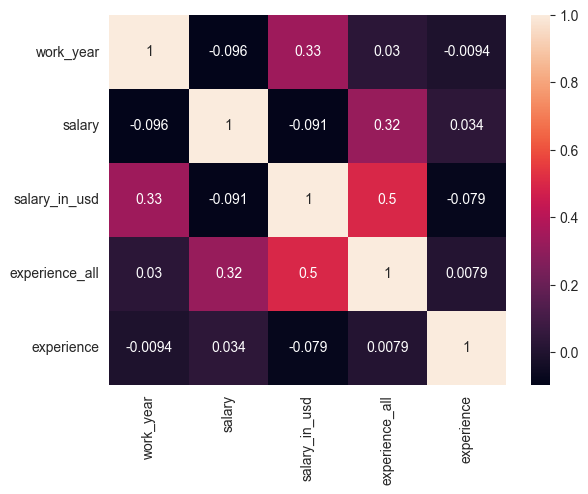

In [1099]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

Выполняется задание номер 1.
Задание 1: Использовать seaborn. По группировке - work_year и количество компаний по различному типу занятости (employment_type).

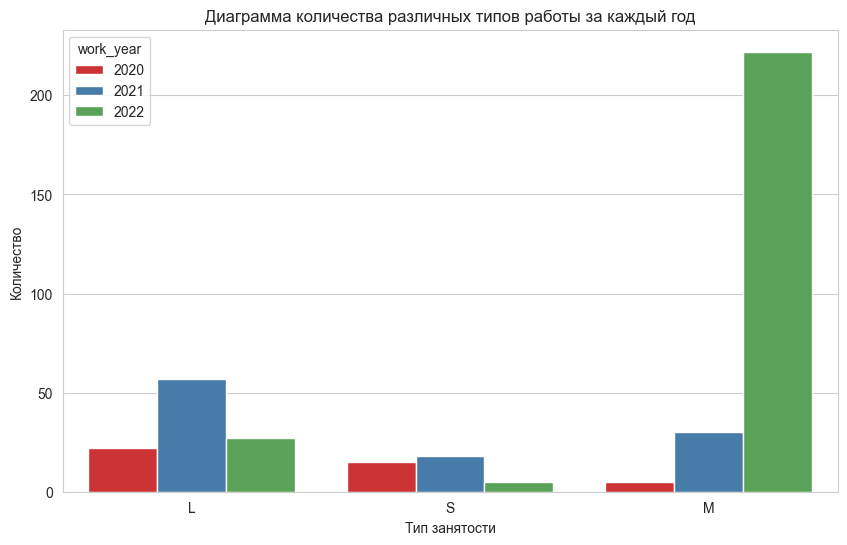

In [1076]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(hue= 'work_year', x= 'company_size', data=df, palette='Set1')
plt.title('Диаграмма количества различных типов работы за каждый год')
plt.xlabel('Тип занятости')
plt.ylabel('Количество')
plt.show()

<Figure size 10000x10000 with 0 Axes>

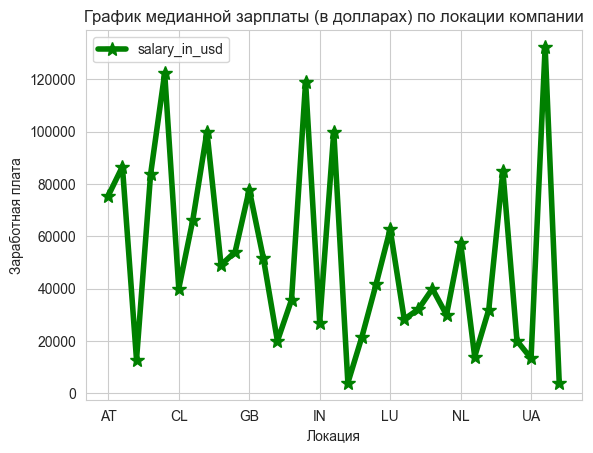

In [1125]:
pivot_table = df.pivot_table(values='salary_in_usd', index='company_location', aggfunc='mean')

# Построение графика с зелёной линией и маркерами
plt.figure(figsize=(100, 100))
pivot_table.plot(kind='line', color='green', linewidth=4, marker='*', markersize=10, )
plt.title('График медианной зарплаты (в долларах) по локации компании')
plt.xlabel('Локация')
plt.ylabel('Заработная плата')
plt.grid(True)
plt.show()

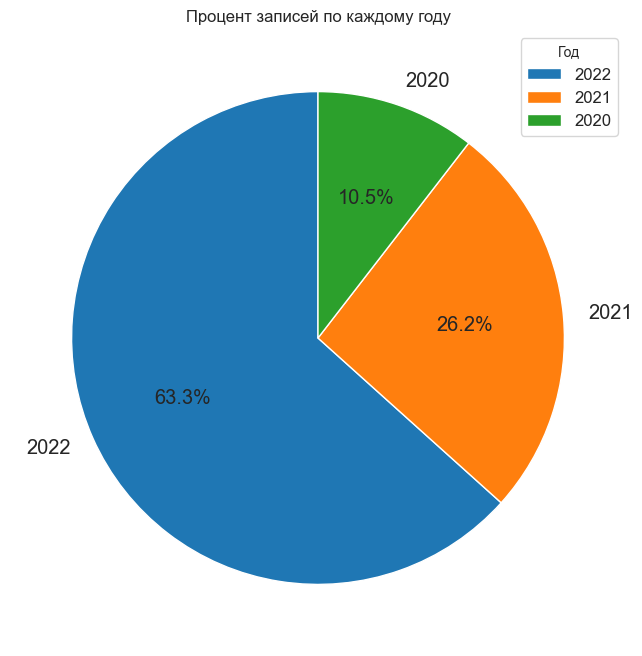

In [1127]:
# Подсчет количества записей по каждому году
year_counts = df['work_year'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90, textprops={'size': 'x-large'})
plt.title('Процент записей по каждому году')
plt.legend(title='Год', fontsize=12, bbox_to_anchor=(1, 1))
plt.show()

## Вывод
По итогам работы были освоены компетенции по предварительной обработке данных, выявлению и устранению проблем с ними. 
Были устранены следующие проблемы с данными:
1. Дубликаты явные и неявные. Были удалены явно дублирующиеся данные, а неявные дубликаты были исправлены путем их переименования.
2. Несоответствие типов данных. Часть данных была в float64 типе, хотя отражали целочисленные значение. Они были приведены к int32.   



Из данных были сделаны следующие выводы: 
1. Медианные зарплаты со временем растут, тогда как средние падают. Виден тренд на повышение зарплат.
2. Зарплаты Full-time работников, ожидаемо, опережают зарплаты Freelance работников. На последнем месте по доходу идут Part-time работники.
3. Зарплаты растут не алгебраически, а, скорее, экспоненциально. У part-time работников зарплаты вырасли за последний год больше, чем на 100%, а у Freelance работников на 500%.